In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


### IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
data.shape

(4238, 16)

In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
data.diabetes.describe()

count    4238.000000
mean        0.025720
std         0.158316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64

In [6]:
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### DATA CLEANING

In [7]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

***CIGARS PER DAY***

In [8]:
data.cigsPerDay.describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

Text(0, 0.5, 'Count')

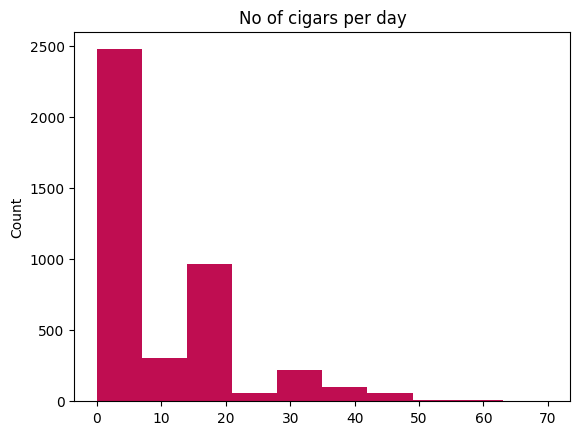

In [9]:
plt.hist(data.cigsPerDay,density=False,color=plt.cm.PuRd(200))
plt.title("No of cigars per day")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

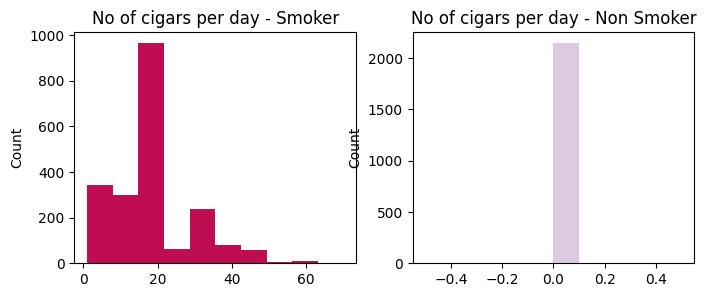

In [10]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].hist(data[data.currentSmoker==1].cigsPerDay,density=False,color=plt.cm.PuRd(200))
axs[0].set_title("No of cigars per day - Smoker")
axs[0].set_ylabel("Count")
axs[1].hist(data[data.currentSmoker==0].cigsPerDay,density=False,color=plt.cm.PuRd(50))
axs[1].set_title("No of cigars per day - Non Smoker")
axs[1].set_ylabel("Count")

#### SLICING - using loc

df.loc[:] = Dataframe

df.loc[int] = Dataframe if you have more than one column and Series if you have only 1 column in the dataframe

df.loc[:, ["colname"]] = Dataframe if you have more than one row and Series if you have only 1 row in the selection

df.loc[:, "colname"] = Series

In [11]:
# Handling missing values in "cigars per day"
# if the person is a current smoker, cigar per day = average cigar per day 
# if the person is a non current smoker, cigar per day = 0

print(data.cigsPerDay.isnull().groupby(by=data.currentSmoker).sum())

currentSmoker
0     0
1    29
Name: cigsPerDay, dtype: int64


In [12]:
data.loc[data.cigsPerDay.isnull(),["cigsPerDay"]] = round(data[data.currentSmoker==1].cigsPerDay.mean())
data.cigsPerDay.isnull().sum()

0

***BP MEDS***

In [13]:
print(pd.crosstab(data.prevalentHyp[data.BPMeds.notnull()],data.BPMeds[data.BPMeds.notnull()]))

BPMeds         0.0  1.0
prevalentHyp           
0             2891    0
1             1170  124


In [14]:
data.prevalentHyp[data.BPMeds.isnull()].groupby(by=data.prevalentHyp).count()

prevalentHyp
0    31
1    22
Name: prevalentHyp, dtype: int64

Text(0.5, 0, 'systolic BP')

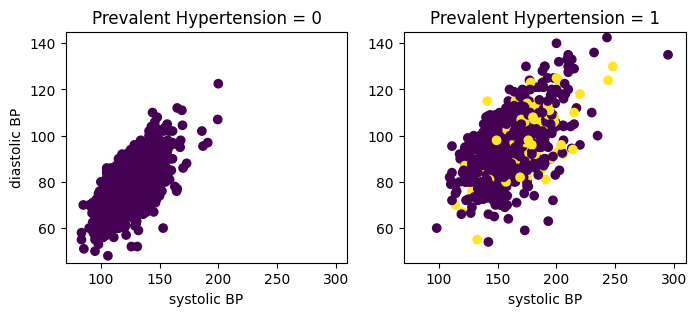

In [15]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].scatter(data.sysBP[data.prevalentHyp==0],data.diaBP[data.prevalentHyp==0],c=data.BPMeds[data.prevalentHyp==0])
axs[0].set_xlim(70,310)
axs[0].set_ylim(45,145)
axs[0].set_title("Prevalent Hypertension = 0")
axs[0].set_xlabel("systolic BP")
axs[0].set_ylabel("diastolic BP")

axs[1].scatter(data.sysBP[data.prevalentHyp==1],data.diaBP[data.prevalentHyp==1],c=data.BPMeds[data.prevalentHyp==1])
axs[1].set_xlim(70,310)
axs[1].set_ylim(45,145)
axs[1].set_title("Prevalent Hypertension = 1")
axs[1].set_xlabel("systolic BP")

##### BP Meds cannot be imputed from the existing data - as neither prevalent Hyptension nor BP levels can be used to create assumption on null BP Med values

In [16]:
#Dropping the rows that have null values in BP meds columns (53 rows will be dropped)

data = data[data.BPMeds.notnull()]

***Correlation***

In [17]:
data.iloc[:,1:].corr()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.164840,-0.211247,-0.189245,0.122995,0.054065,0.305296,0.102062,0.259827,0.393246,0.208288,0.135224,-0.012284,0.121740,0.223913
education,-0.164840,1.000000,0.018111,0.008185,-0.010815,-0.033119,-0.082818,-0.036567,-0.022202,-0.130851,-0.065582,-0.136526,-0.055059,-0.034207,-0.054986
currentSmoker,-0.211247,0.018111,1.000000,0.770699,-0.048938,-0.030866,-0.100672,-0.042240,-0.045805,-0.126497,-0.104615,-0.168864,0.062707,-0.054428,0.021011
cigsPerDay,-0.189245,0.008185,0.770699,1.000000,-0.046953,-0.031603,-0.063936,-0.036279,-0.024672,-0.086001,-0.053251,-0.090107,0.073926,-0.055510,0.057560
BPMeds,0.122995,-0.010815,-0.048938,-0.046953,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,0.054065,-0.033119,-0.030866,-0.031603,0.117365,1.000000,0.072436,0.007746,-0.003664,0.057222,0.051611,0.030181,-0.013400,0.010006,0.056258
prevalentHyp,0.305296,-0.082818,-0.100672,-0.063936,0.261187,0.072436,1.000000,0.078338,0.161667,0.695816,0.617078,0.303532,0.147402,0.086677,0.176445
diabetes,0.102062,-0.036567,-0.042240,-0.036279,0.052047,0.007746,0.078338,1.000000,0.043945,0.109452,0.051571,0.083575,0.050515,0.619000,0.096400
totChol,0.259827,-0.022202,-0.045805,-0.024672,0.080558,-0.003664,0.161667,0.043945,1.000000,0.209684,0.166807,0.120918,0.091907,0.046629,0.076440
sysBP,0.393246,-0.130851,-0.126497,-0.086001,0.254219,0.057222,0.695816,0.109452,0.209684,1.000000,0.784612,0.329535,0.181225,0.140621,0.216276


***GLUCOSE LEVEL***

		Mean glucose=79				Mean glucose=171
		Median glucose=78			Median glucose=147


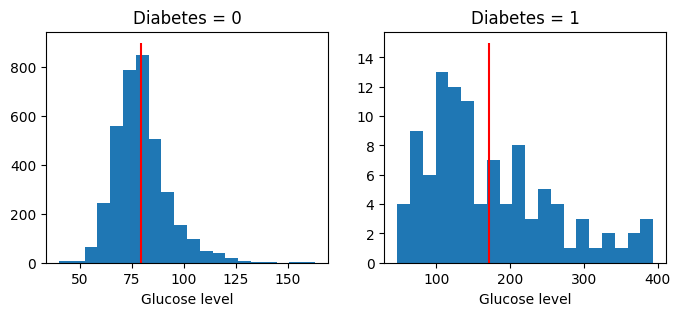

In [18]:
gluc_mu = [data.glucose[data.diabetes==0].mean(),data.glucose[data.diabetes==1].mean()]
gluc_med = [data.glucose[data.diabetes==0].median(),data.glucose[data.diabetes==1].median()]
print(f"\t\tMean glucose={gluc_mu[0]:.0f}",end="\t")
print(f"\t\t\tMean glucose={gluc_mu[1]:.0f}")
print(f"\t\tMedian glucose={gluc_med[0]:.0f}",end="\t")
print(f"\t\tMedian glucose={gluc_med[1]:.0f}")
fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].hist(data.glucose[data.diabetes==0],density=False,bins=20)
axs[0].set_title("Diabetes = 0")
axs[0].set_xlabel("Glucose level")
axs[0].vlines(gluc_mu[0],0,900,colors="red")

axs[1].hist(data.glucose[data.diabetes==1],density=False, bins=20)
axs[1].set_title("Diabetes = 1")
axs[1].set_xlabel("Glucose level")
axs[1].vlines(gluc_mu[1],0,15,colors="red")

plt.show()

##### Glucose level distribution is right skewed when diabetes is 1. Mean will be pulled towards the tail. 
##### Median glucose level of two categories (categories: Diabetes=0/Diabetes=1) can be used for handling null value in Glucose level

In [19]:
idx = data[data.glucose.isnull()].index
temp = data.loc[idx,["glucose","diabetes"]]
print("Null data split by diabetes group")
temp.groupby(by=data.diabetes).count()

Null data split by diabetes group


,glucose,diabetes
diabetes,,
0,0,382
1,0,4


In [20]:
#Imputing the null values with median

data.loc[(data.glucose.isnull())&(data.diabetes==1),["glucose"]] = gluc_med[1]
data.loc[(data.glucose.isnull())&(data.diabetes==0),["glucose"]] = gluc_med[0]

In [21]:
temp = data.loc[idx,["glucose","diabetes"]]
print("data split by diabetes group")
temp.groupby(by=data.diabetes).median()

data split by diabetes group


,glucose,diabetes
diabetes,,
0,78.0,0.0
1,147.0,1.0


***BMI***

**BMI	Weight Status**  
Below 18.5   -> Underweight  
18.5 – 24.9  -> Healthy Weight  
25.0 – 29.9  -> Overweight  
30.0 & Above -> Obesity  

Reference: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

In [22]:
dk = data[data.prevalentHyp==0]
bmi_group0 = [0 if dk.BMI.iloc[i] <= 18.5 else 1 if 18.5<=dk.BMI.iloc[i] <=24.9 else 2 if 25.0<= dk.BMI.iloc[i]<=29.9 else 3 for i in range(len(dk))]
dj = data[data.prevalentHyp==1]
bmi_group1 = [0 if dj.BMI.iloc[i] <= 18.5 else 1 if 18.5<=dj.BMI.iloc[i] <=24.9 else 2 if 25.0<= dj.BMI.iloc[i]<=29.9 else 3 for i in range(len(dj))]

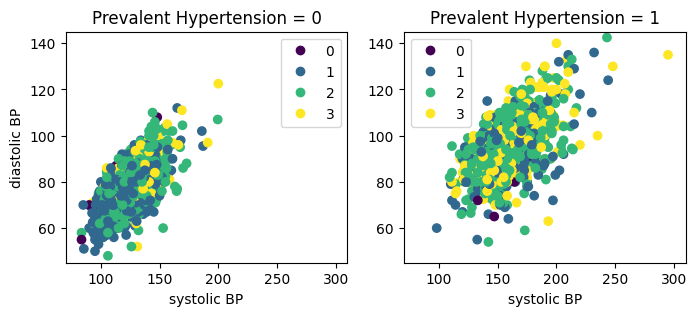

In [23]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
sc0 = axs[0].scatter(data.sysBP[data.prevalentHyp==0],data.diaBP[data.prevalentHyp==0],c=bmi_group0)
axs[0].set_xlim(70,310)
axs[0].set_ylim(45,145)
axs[0].set_title("Prevalent Hypertension = 0")
axs[0].set_xlabel("systolic BP")
axs[0].set_ylabel("diastolic BP")

axs[0].legend(*sc0.legend_elements())

sc1 = axs[1].scatter(data.sysBP[data.prevalentHyp==1],data.diaBP[data.prevalentHyp==1],c=bmi_group1)
axs[1].set_xlim(70,310)
axs[1].set_ylim(45,145)
axs[1].set_title("Prevalent Hypertension = 1")
axs[1].set_xlabel("systolic BP")

axs[1].legend(*sc1.legend_elements())

plt.show()

	Mean BMI :25				Mean BMI :28


Text(0.5, 1.0, 'Prevalent Hypertension=1')

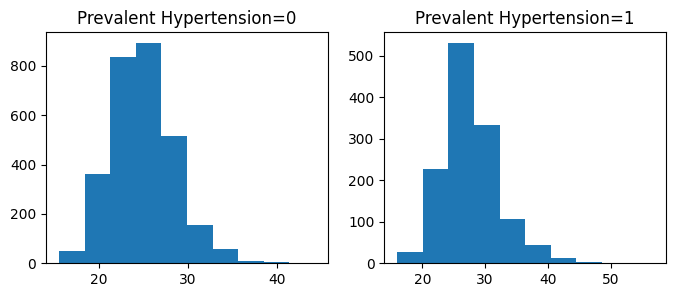

In [24]:
bmi_mu = [data[data.prevalentHyp==0].BMI.mean(),data[data.prevalentHyp==1].BMI.mean()]
print(f"\tMean BMI :{bmi_mu[0]:.0f}",end="\t")
print(f"\t\t\tMean BMI :{bmi_mu[1]:.0f}")

fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].hist(data[data.prevalentHyp==0].BMI)
axs[0].set_title("Prevalent Hypertension=0")

axs[1].hist(data[data.prevalentHyp==1].BMI)
axs[1].set_title("Prevalent Hypertension=1")


In [25]:
#Imputing the null values with Mean BMI

data.loc[(data.BMI.isnull())&(data.prevalentHyp==0),["BMI"]] = bmi_mu[0]
data.loc[(data.BMI.isnull())&(data.prevalentHyp==1),["BMI"]] = bmi_mu[1]

***TOTAL CHOLESTROL***

	Mean Cholestrol level :232				Mean Cholestrol level :247


Text(0.5, 1.0, 'Prevalent Hypertension=1')

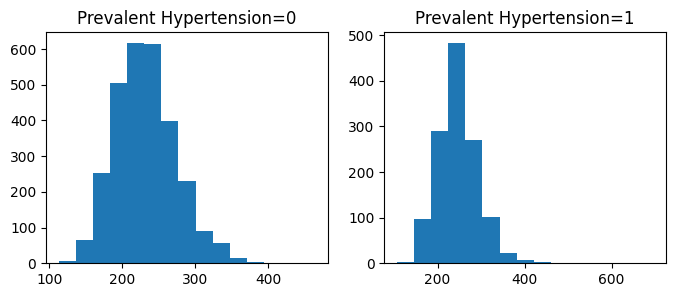

In [26]:
chol_mu = [data[data.prevalentHyp==0].totChol.mean(),data[data.prevalentHyp==1].totChol.mean()]
print(f"\tMean Cholestrol level :{chol_mu[0]:.0f}",end="\t")
print(f"\t\t\tMean Cholestrol level :{chol_mu[1]:.0f}")

fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].hist(data[data.prevalentHyp==0].totChol,bins=15)
axs[0].set_title("Prevalent Hypertension=0")

axs[1].hist(data[data.prevalentHyp==1].totChol,bins=15)
axs[1].set_title("Prevalent Hypertension=1")


In [27]:
data.loc[:,"age_group"] = data.age.apply(lambda s: "30 to 40" if 30<=s<=40 else "40 to 50" if 40<=s<=50 else "50 to 60" if 50<=s<=60 else "60 to 70" if 60<=s<=70 else "Above 70")

In [28]:
age_series = data.totChol.groupby(by=data.age_group).median()
age_series

age_group
30 to 40    210.0
40 to 50    230.0
50 to 60    245.0
60 to 70    245.0
Name: totChol, dtype: float64

In [29]:
#Imputing the cholestroll null values based on age group

data.loc[data.totChol.isnull(),["totChol"]] = data.loc[data.totChol.isnull(),"age_group"].apply(lambda c: age_series[c])

In [30]:
data = data.iloc[:,0:-1]

***HEART RATE***

In [31]:
data = data[data.heartRate.notnull()]

In [32]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

### OUTLIERS

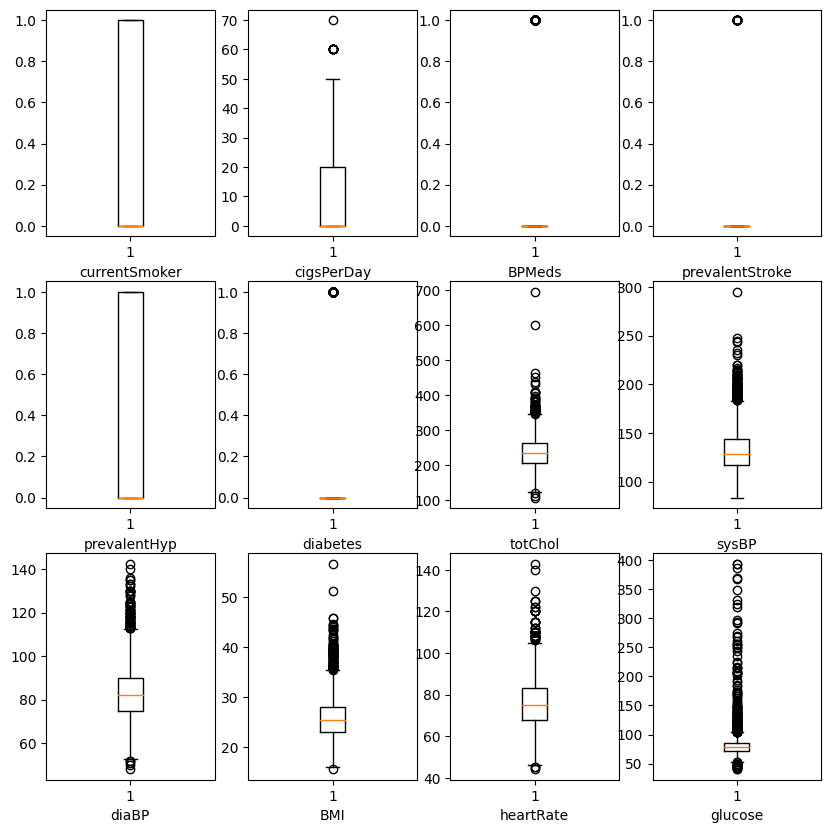

In [33]:
fig,axs = plt.subplots(3,4,figsize=(10,10))
rows = 3
cols = 4
n=3
for i in range(rows):
    for j in range(cols):
        axs[i][j].boxplot(data.iloc[:,n])
        axs[i][j].set_xlabel(data.columns[n])
        n+=1

### TRAIN AND TEST SPLIT

In [34]:
y = data.TenYearCHD
x = data.drop(["education","TenYearCHD"],axis=1)

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [35]:
# y = data.TenYearCHD
# x = data.drop(["education","TenYearCHD"],axis=1)

# np.random.seed(0)

# test_idx = np.append(np.random.choice((np.where(y==1))[0],460,replace=False),np.random.choice((np.where(y==0))[0],460,replace=False))
# train_idx = list(set(range(len(x))) - set(test_idx))

# train_x = x.iloc[train_idx,]
# train_y = y.iloc[train_idx]

# test_x = x.iloc[test_idx,]
# test_y = y.iloc[test_idx]

In [36]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3347, 14)
(3347,)
(837, 14)
(837,)


In [37]:
from collections import Counter

print(train_y.unique)
Counter(train_y)

<bound method Series.unique of 3890    0
2042    0
864     1
1760    1
3934    0
       ..
3559    0
3039    0
2106    1
3872    1
2453    0
Name: TenYearCHD, Length: 3347, dtype: int64>


Counter({0: 2829, 1: 518})

### FEATURE SCALING

In [38]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### LOGISTIC REGRESION

In [39]:
from sklearn.linear_model import LogisticRegression

lr_obj = LogisticRegression()
lr_obj.fit(train_x,train_y)
y_pred = lr_obj.predict(test_x)

In [40]:
test_err = np.sum( (y_pred>0.0) != (test_y>0.0) )
print("Test error: ",test_err/len(test_x))

Test error:  0.13739545997610514


In [41]:
w = lr_obj.coef_
b = lr_obj.intercept_
print("W:",w)
print("b:",b)

W: [[ 0.27859515  0.52112021  0.05994462  0.17910854  0.02855301  0.07005828
   0.08990663 -0.02221551  0.03533468  0.39031839 -0.06543281  0.02507997
  -0.01772894  0.15681711]]
b: [-1.94835753]


In [42]:
print(f"Model accuracy: {lr_obj.score(test_x,test_y)*100:.1f} %")

Model accuracy: 86.3 %


### CONFUSION MATRIX

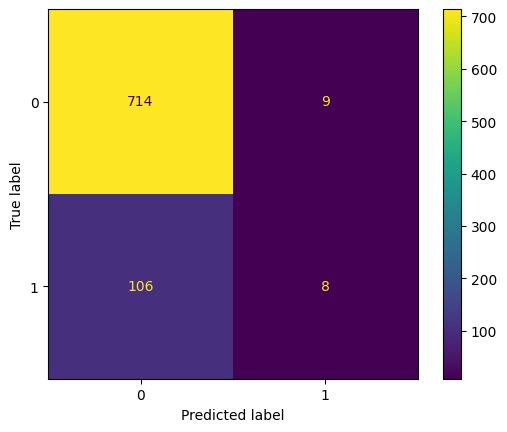

In [43]:
ConfusionMatrixDisplay.from_predictions(test_y,y_pred)

In [44]:
test_x[0,:]

array([-0.87215382, -0.88922257,  1.01474873, -0.00110409, -0.17367535,
       -0.07753336, -0.66860936, -0.16044682, -0.95993431, -0.28650387,
       -0.15533167, -0.86718131,  0.68594883, -0.19794279])

In [45]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
loss = 0
m = len(test_x)
for i in range(m):
    zi = np.dot(w,test_x[i,:])+b
    f_xi = sigmoid(zi)
    loss += (test_y.iloc[i] * np.log(f_xi)) + ((1-test_y.iloc[i]) * np.log(1-f_xi))

cost = (-1/m)*(loss)

print("Cost: ",cost)

Cost:  [0.35890233]
